In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [25]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [28]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min, [-40, 20, 0])

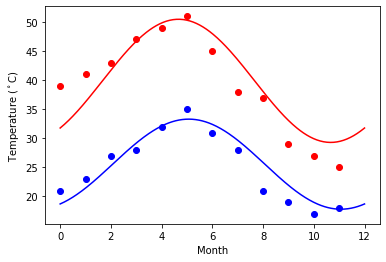

In [29]:
days = np.linspace(0, 12, num=365)
months = np.arange(12)
plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [71]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.sex = titanic.sex.fillna('female')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


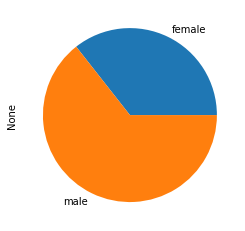

In [51]:
titanic.groupby('sex').size().plot(kind='pie', y)

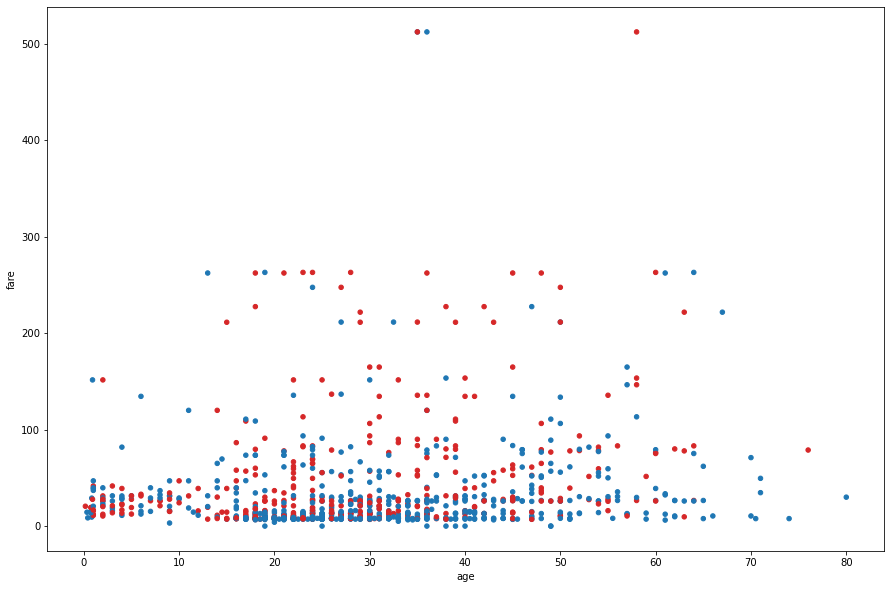

In [99]:
colours = {'female': 'tab:red', 'male': 'tab:blue'}
titanic.plot.scatter(x='age', y='fare', figsize=(15,10), c=titanic.sex.map(colours),)

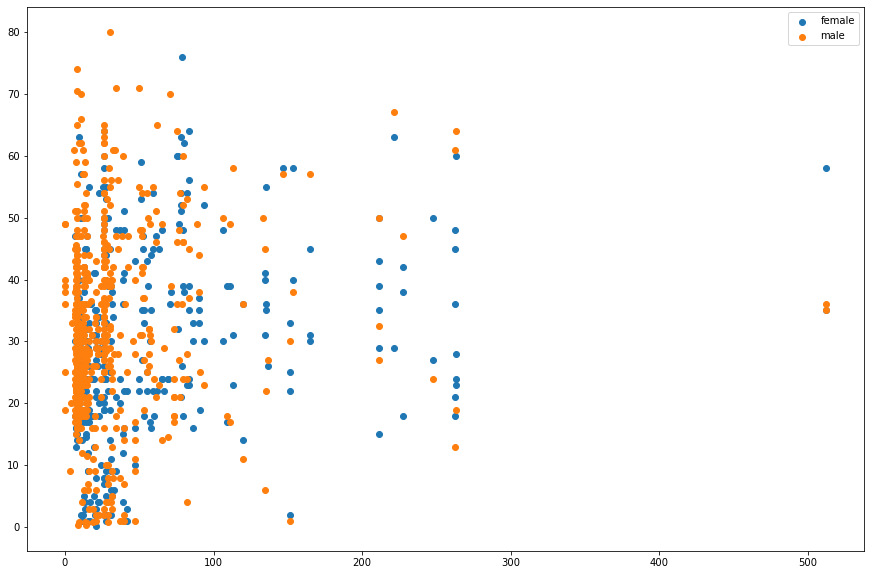

In [100]:
fig,ax = plt.subplots(figsize=(15, 10))
for k,d in titanic.groupby('sex'):
    ax.scatter(x=d['fare'], y=d['age'], label=k)
plt.legend()
